<a href="https://colab.research.google.com/github/curiousthinker85/python-practice/blob/main/telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
data.shape

(7043, 21)

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
categorical_var = list(data.dtypes.loc[data.dtypes == 'object'].index)
print(len(categorical_var))
print(categorical_var)

17
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [9]:
categorical_var.remove('customerID')

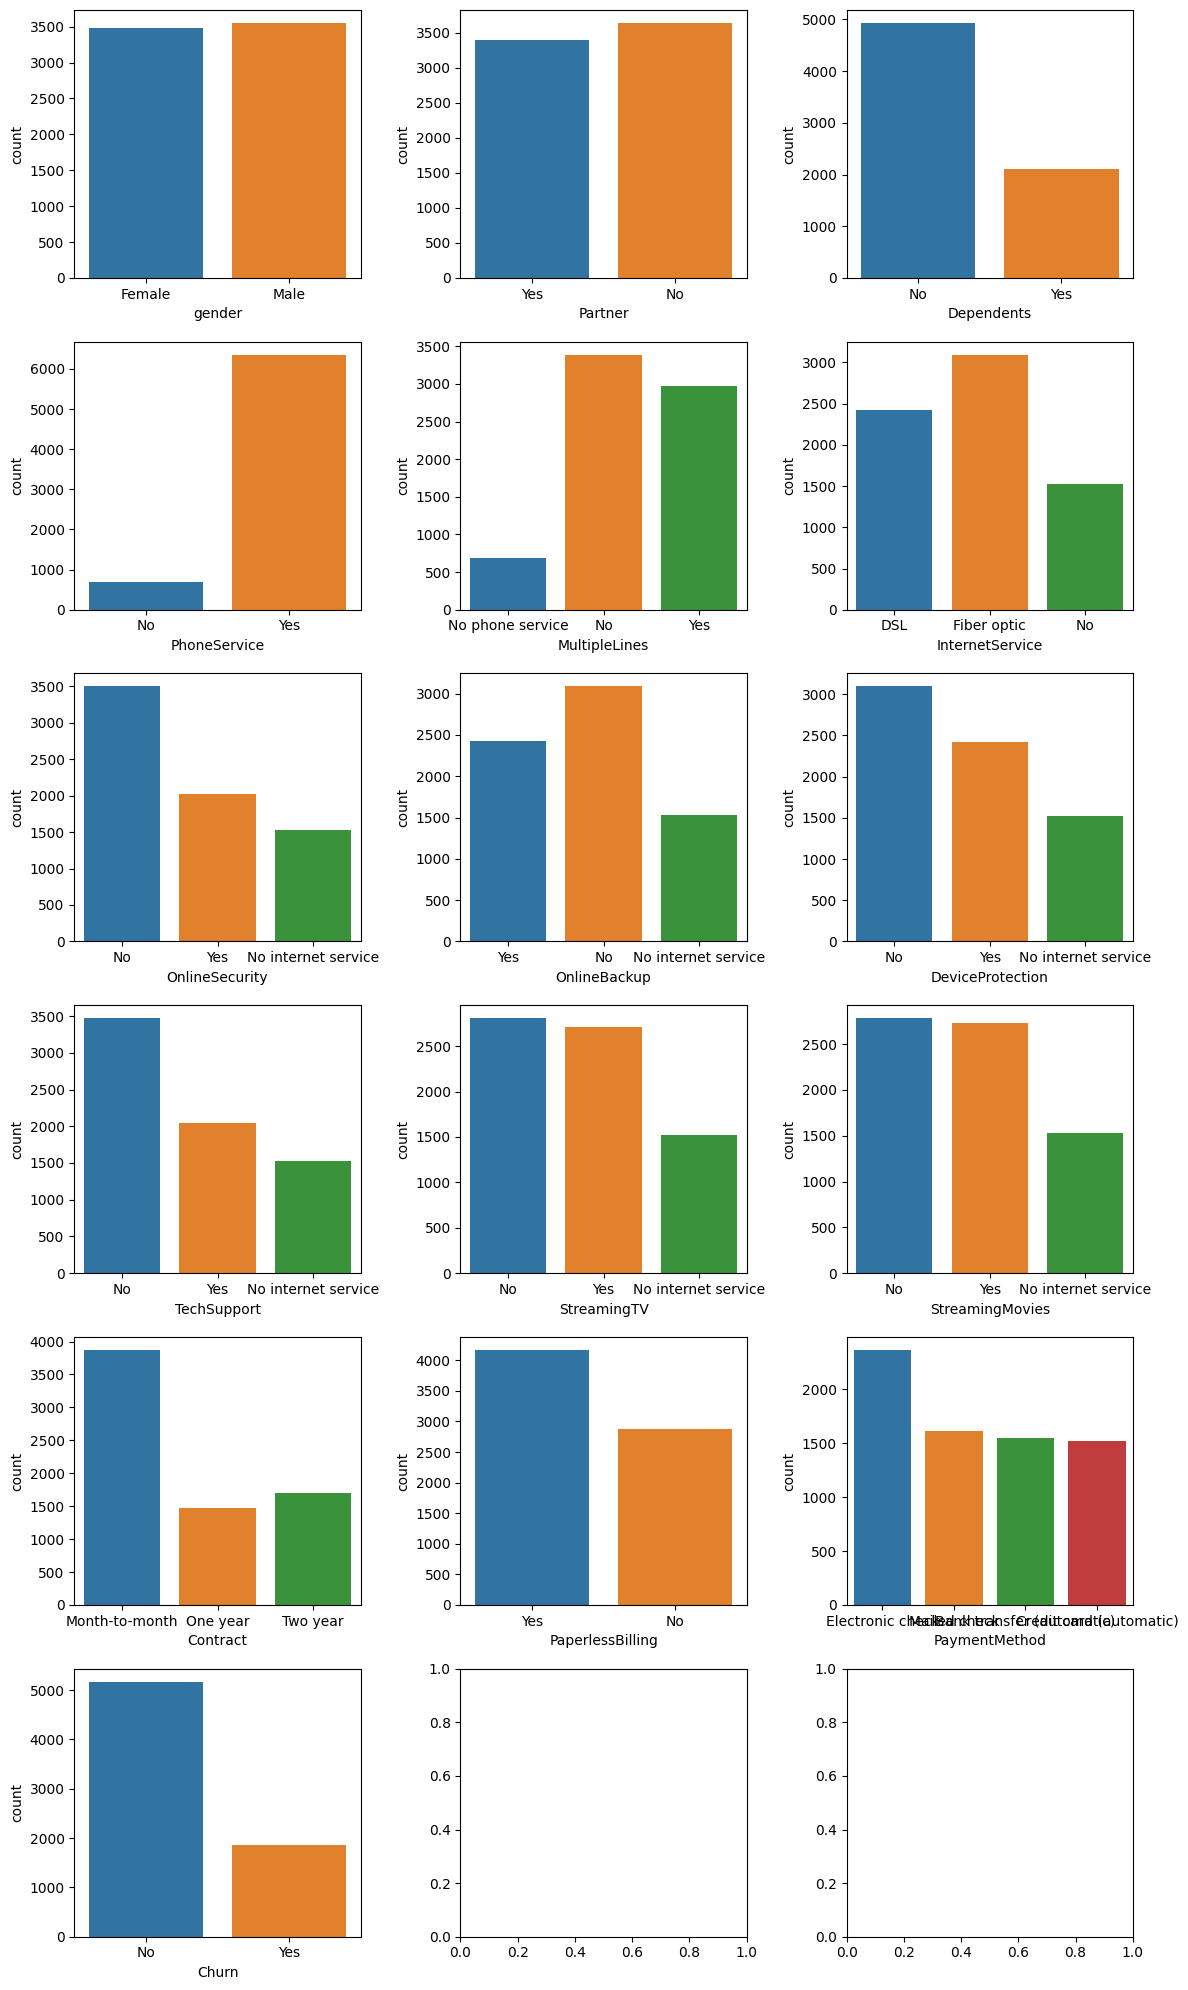

In [12]:
# Create subplots
fig, ax = plt.subplots(6, 3, figsize=(12, 20))

# Categorical columns to plot
categorical_var = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Iterate through columns and create count plots
for i, column in enumerate(categorical_var):
    sns.countplot(data=data, x=column, ax=ax[i // 3, i % 3])

# Add spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### Continuous Variables

1. SeniorCitizen
2. tenure
3. MonthlyCharges
4. TotalCharges

In [13]:
continuous_var = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

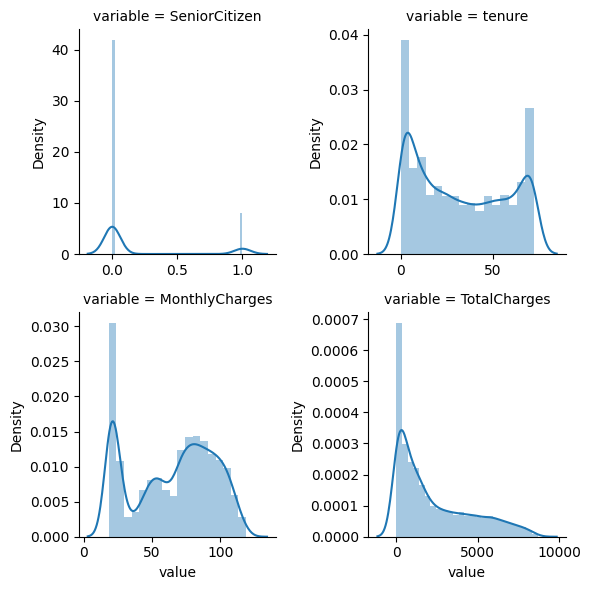

In [14]:
nd = pd.melt(data, value_vars = continuous_var)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=2, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### 1. Continuous-Continuous Variables

<Axes: >

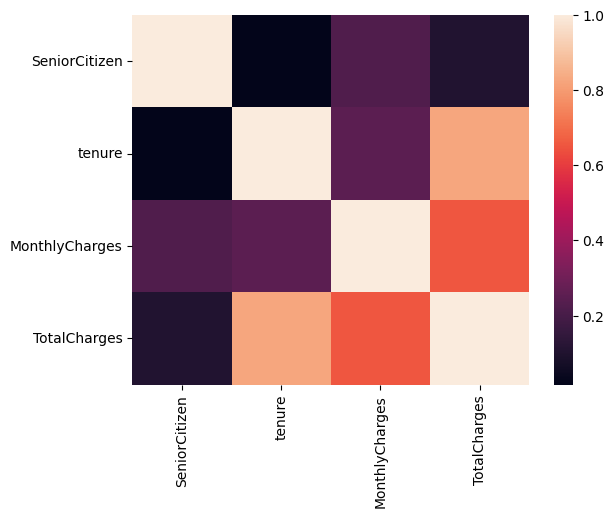

In [15]:
corr = data[continuous_var].corr()
sns.heatmap(corr)

In [16]:
print (corr['TotalCharges'].sort_values(ascending=False), '\n')

TotalCharges      1.000000
tenure            0.825880
MonthlyCharges    0.651065
SeniorCitizen     0.102411
Name: TotalCharges, dtype: float64 



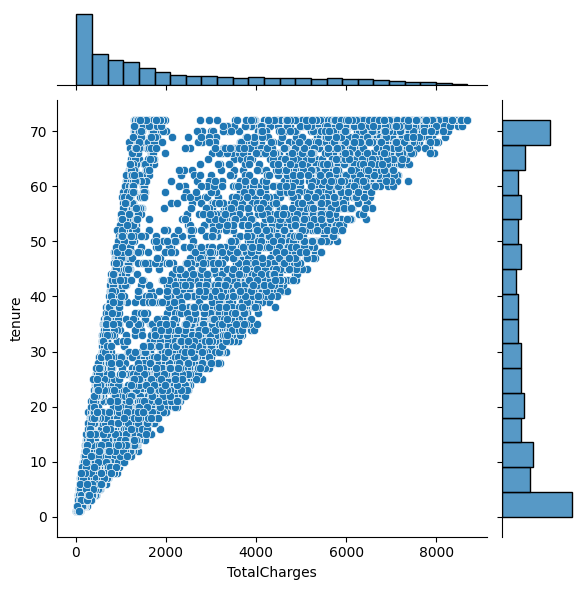

In [17]:
sns.jointplot(x=data['TotalCharges'], y=data['tenure'])

### Chi Square test


In [18]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None

        self.dfObserved = None
        self.dfExpected = None

    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)

    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)

        self.dfObserved = pd.crosstab(Y,X)
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof

        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)

        self._print_chisquare_result(colX,alpha)

df = data
#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
for var in categorical_var:
    cT.TestIndependence(colX=var,colY="Churn" )

gender is NOT an important predictor. (Discard gender from model)
Partner is IMPORTANT for Prediction
Dependents is IMPORTANT for Prediction
PhoneService is NOT an important predictor. (Discard PhoneService from model)
MultipleLines is IMPORTANT for Prediction
InternetService is IMPORTANT for Prediction
OnlineSecurity is IMPORTANT for Prediction
OnlineBackup is IMPORTANT for Prediction
DeviceProtection is IMPORTANT for Prediction
TechSupport is IMPORTANT for Prediction
StreamingTV is IMPORTANT for Prediction
StreamingMovies is IMPORTANT for Prediction
Contract is IMPORTANT for Prediction
PaperlessBilling is IMPORTANT for Prediction
PaymentMethod is IMPORTANT for Prediction
Churn is IMPORTANT for Prediction


In [19]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

## Feature selection / extraction


In [21]:
categorical_var

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [22]:
#first convert all the string columns to categorical form
for var in categorical_var:
    data[var] = data[var].astype('category')

In [23]:
data[categorical_var] = data[categorical_var].apply(lambda x: x.cat.codes)

In [24]:
target = data['Churn']
data=data.drop('customerID',axis=1)
all_columns = list(data.columns)
all_columns.remove('Churn')

In [27]:

import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data[all_columns] # Features
y = data['Churn'] # Target variable

# Feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=8)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 8
Selected Features: [False  True False  True False  True False False  True  True False  True
 False False  True  True False False False]
Feature Ranking: [ 9  1  8  1  3  1  2  6  1  1  4  1 11 10  1  1  5  7 12]


In [28]:
selected_features_rfe = list(fit.support_)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

final_features_rfe = []
for status, var in zip(selected_features_rfe, all_columns):
    if status == True:
        final_features_rfe.append(var)

final_features_rfe

['SeniorCitizen',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'Contract',
 'PaperlessBilling']

In [30]:
X_rfe_lr = data[final_features_rfe]
y = data['Churn']

X_train_rfe_lr,X_test_rfe_lr,y_train_rfe_lr,y_test_rfe_lr=train_test_split(X_rfe_lr,y,test_size=0.25,random_state=0)

lr_model = LogisticRegression()

# fit the model with data
lr_model.fit(X_train_rfe_lr,y_train_rfe_lr)
y_pred_rfe_lr=lr_model.predict(X_test_rfe_lr)

acc_rfe_lr = metrics.accuracy_score(y_test_rfe_lr, y_pred_rfe_lr)
print("Accuracy: ",acc_rfe_lr)


Accuracy:  0.7677455990914254


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# instantiate the model (using the default parameters)
lr_model_single = LogisticRegression()

# fit the model with data
lr_model_single.fit(X_train,y_train)
y_pred=lr_model_single.predict(X_test)

lr_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ",lr_acc)

Accuracy:  0.7961385576377058


In [32]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1151,  147],
       [ 212,  251]])

In [33]:
from sklearn.metrics import roc_curve, auc
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_pred_rfe_lr)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred)
roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_2 = auc(fpr_2, tpr_2)

Text(0.5, 0, 'False Positive Rate')

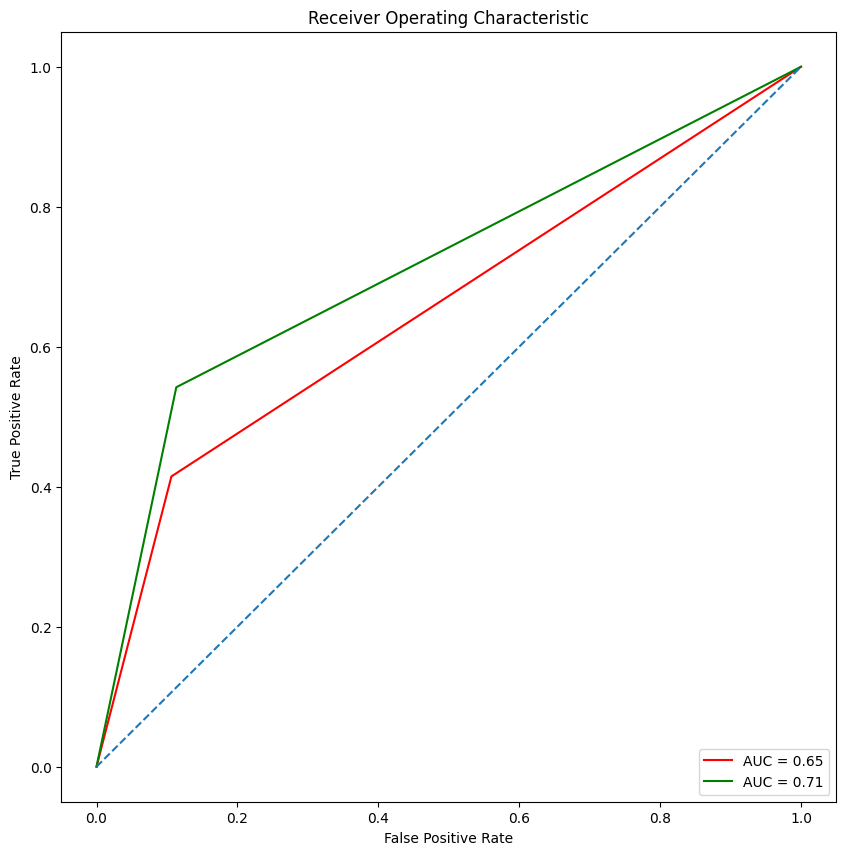

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1,tpr_1, color='red',label = 'AUC = %0.2f' % roc_auc_1)
plt.plot(fpr_2,tpr_2, color='green',label = 'AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')